# Higgs Boson Detection 2024
*Searching for exotic particles in high-energy physics with machine learning*

## Overview
The goal of this competition is to classify events into two classes: events that produce the exotic Higgs Boson particle, and those that do not. Each event is a simulated particle collision represented by 28 features that describe the trajectories of decay particles. These are realistic simulations of particle collisions occuring in the ATLAS detector at the Large Hadron Collider at CERN, near Geneva, Switzerland.

An analysis like this was used to discover the Higgs Boson in 2012; a machine learning classifier was trained on simulation and calibration data, then used to analyze real data from the experiment. Improved machine learning methods for this type of data could enable physicists to make new discoveries faster. It is thought that there are additional particles yet to be discovered, so more sensitive machine learning methods could help scientists discover new physics.

## Dataset

This data set is a sample from the HIGGS data set published with [Baldi, Sadowski, and Whiteson, Searching for Exotic Particles in High-Energy Physics with Deep Learning](https://www.nature.com/articles/ncomms5308) and available [here](https://archive.ics.uci.edu/ml/datasets/HIGGS).

In [1]:
%%bash
mkdir -p data

In [2]:
!wget "https://archive.ics.uci.edu/static/public/280/higgs.zip" -P data -q --show-progress

higgs.zip               [ <=>                ]   2.62G  55.8MB/s    in 55s     


In [3]:
!unzip data/higgs.zip

Archive:  data/higgs.zip
  inflating: HIGGS.csv.gz            


In [4]:
!gzip -d HIGGS.csv.gz

In [5]:
!ls

data  HIGGS.csv  sample_data


In [6]:
#Load the dataset using pandas and numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
column_names = ['lable', 'lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
                'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [8]:
df = pd.read_csv('HIGGS.csv', header=None, nrows=200000)
df.columns=column_names

In [9]:
df.head()

,lable,lep_pt,lep_eta,lep_phi,MET,MET_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [10]:
features_low = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag']

features_high = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

features = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
            'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
            'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
            'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
            'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
            'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [11]:
Y = df['lable'].values
X = df[[col for col in features]]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

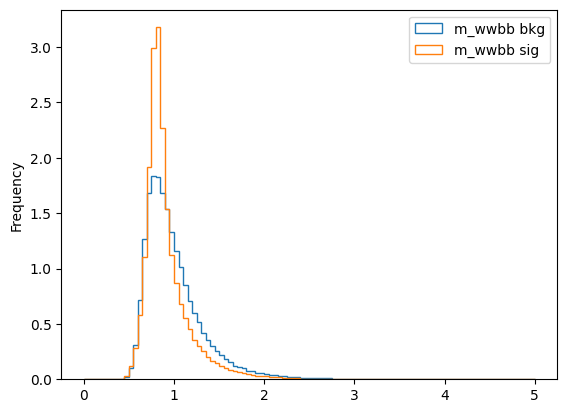

In [12]:
import matplotlib.pyplot as plt

#plot a few features
var_name = 'm_wwbb'
ax = df[df['lable']==0].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density=True)
#ax.set_yscale('log')
df[df['lable']==1].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density = True, ax=ax)
ax.legend(labels=[var_name+' bkg', var_name+' sig'])

In [13]:
# Enjoy!

In [14]:
Y = df['lable'].values
X = df[[col for col in features_high]]

In [60]:
# baseline keras model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (
    Input,
    Activation,
    Dense,
    Convolution2D,
    MaxPooling2D,
    Dropout,
    Flatten,
)

VARS = features_high
NDIM = len(VARS)
inputs = Input(shape=(NDIM,), name="input")

x = Dense(128, activation="relu")(inputs)
x = Dropout(0.25)(x) # .3

x = Dense(64, activation="relu")(x)
x = Dropout(0.1)(x) # .2

x = Dense(32, activation="relu")(x)
x = Dropout(0.05)(x) # .1

x = Dense(16, activation="relu")(x)
x = Dropout(0.05)(x) # .1

outputs = Dense(1, name="output", kernel_initializer="normal", activation="sigmoid")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# Print the model summary
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# preprocessing: standard scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

In [62]:
# early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=15)

In [63]:
# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    "dense_model.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)

In [64]:
# Train classifier
history = model.fit(
    X_train,
    Y_train,
    epochs=1000,
    batch_size=1024,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint],
    validation_split=0.25,
)

Epoch 1/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5819 - loss: 0.6791

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5847 - loss: 0.6774 - val_accuracy: 0.6726 - val_loss: 0.6096
Epoch 2/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6694 - loss: 0.6108

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6696 - loss: 0.6105 - val_accuracy: 0.6812 - val_loss: 0.5917
Epoch 3/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6787 - loss: 0.5936

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6787 - loss: 0.5936 - val_accuracy: 0.6869 - val_loss: 0.5792
Epoch 4/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6821 - loss: 0.5870

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6821 - loss: 0.5869 - val_accuracy: 0.6897 - val_loss: 0.5734
Epoch 5/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6845 - loss: 0.5812

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6846 - loss: 0.5811 - val_accuracy: 0.6929 - val_loss: 0.5684
Epoch 6/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6899 - loss: 0.5757

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6900 - loss: 0.5756 - val_accuracy: 0.6957 - val_loss: 0.5672
Epoch 7/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6914 - loss: 0.5755

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6914 - loss: 0.5755 - val_accuracy: 0.6980 - val_loss: 0.5653
Epoch 8/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6912 - loss: 0.5735

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6912 - loss: 0.5735 - val_accuracy: 0.6983 - val_loss: 0.5642
Epoch 9/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6948 - loss: 0.5708

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6948 - loss: 0.5708 - val_accuracy: 0.7010 - val_loss: 0.5633
Epoch 10/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6939 - loss: 0.5694

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6939 - loss: 0.5694 - val_accuracy: 0.6992 - val_loss: 0.5621
Epoch 11/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6935 - loss: 0.5708

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6936 - loss: 0.5707 - val_accuracy: 0.7013 - val_loss: 0.5615
Epoch 12/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6966 - loss: 0.5682

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6966 - loss: 0.5682 - val_accuracy: 0.7026 - val_loss: 0.5601
Epoch 13/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6964 - loss: 0.5678

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6964 - loss: 0.5678 - val_accuracy: 0.7031 - val_loss: 0.5595
Epoch 14/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6988 - loss: 0.5639 - val_accuracy: 0.7041 - val_loss: 0.5597
Epoch 15/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6981 - loss: 0.5645

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6980 - loss: 0.5646 - val_accuracy: 0.7035 - val_loss: 0.5585
Epoch 16/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6980 - loss: 0.5671

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6980 - loss: 0.5670 - val_accuracy: 0.7055 - val_loss: 0.5579
Epoch 17/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6977 - loss: 0.5635 - val_accuracy: 0.7029 - val_loss: 0.5583
Epoch 18/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5675

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6984 - loss: 0.5673 - val_accuracy: 0.7062 - val_loss: 0.5567
Epoch 19/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6985 - loss: 0.5634 - val_accuracy: 0.7057 - val_loss: 0.5575
Epoch 20/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7003 - loss: 0.5620

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7002 - loss: 0.5621 - val_accuracy: 0.7065 - val_loss: 0.5561
Epoch 21/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6968 - loss: 0.5644

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6970 - loss: 0.5644 - val_accuracy: 0.7081 - val_loss: 0.5558
Epoch 22/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6977 - loss: 0.5641 - val_accuracy: 0.7059 - val_loss: 0.5564
Epoch 23/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7014 - loss: 0.5604

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7013 - loss: 0.5605 - val_accuracy: 0.7064 - val_loss: 0.5553
Epoch 24/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6993 - loss: 0.5615 - val_accuracy: 0.7069 - val_loss: 0.5557
Epoch 25/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7006 - loss: 0.5622

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7006 - loss: 0.5622 - val_accuracy: 0.7068 - val_loss: 0.5552
Epoch 26/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7059 - loss: 0.5570

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7056 - loss: 0.5573 - val_accuracy: 0.7069 - val_loss: 0.5541
Epoch 27/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7006 - loss: 0.5639 - val_accuracy: 0.7073 - val_loss: 0.5549
Epoch 28/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7024 - loss: 0.5607 - val_accuracy: 0.7082 - val_loss: 0.5544
Epoch 29/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7051 - loss: 0.5587 - val_accuracy: 0.7081 - val_loss: 0.5547
Epoch 30/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7022 - loss: 0.5603

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7022 - loss: 0.5603 - val_accuracy: 0.7074 - val_loss: 0.5536
Epoch 31/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7021 - loss: 0.5575 - val_accuracy: 0.7082 - val_loss: 0.5536
Epoch 32/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7056 - loss: 0.5574 - val_accuracy: 0.7085 - val_loss: 0.5538
Epoch 33/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.5598 - val_accuracy: 0.7076 - val_loss: 0.5543
Epoch 34/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7014 - loss: 0.5600

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7015 - loss: 0.5600 - val_accuracy: 0.7089 - val_loss: 0.5532
Epoch 35/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7057 - loss: 0.5575

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7057 - loss: 0.5575 - val_accuracy: 0.7083 - val_loss: 0.5528
Epoch 36/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7035 - loss: 0.5589 - val_accuracy: 0.7082 - val_loss: 0.5535
Epoch 37/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7013 - loss: 0.5604

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7014 - loss: 0.5603 - val_accuracy: 0.7085 - val_loss: 0.5525
Epoch 38/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7061 - loss: 0.5565 - val_accuracy: 0.7078 - val_loss: 0.5530
Epoch 39/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7071 - loss: 0.5561 - val_accuracy: 0.7081 - val_loss: 0.5532
Epoch 40/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7048 - loss: 0.5558

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7048 - loss: 0.5559 - val_accuracy: 0.7102 - val_loss: 0.5524
Epoch 41/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7044 - loss: 0.5568 - val_accuracy: 0.7097 - val_loss: 0.5527
Epoch 42/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5566 - val_accuracy: 0.7091 - val_loss: 0.5526
Epoch 43/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7060 - loss: 0.5566 - val_accuracy: 0.7097 - val_loss: 0.5530
Epoch 44/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7077 - loss: 0.5532

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7076 - loss: 0.5534 - val_accuracy: 0.7097 - val_loss: 0.5518
Epoch 45/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7046 - loss: 0.5569 - val_accuracy: 0.7092 - val_loss: 0.5524
Epoch 46/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7047 - loss: 0.5580 - val_accuracy: 0.7094 - val_loss: 0.5527
Epoch 47/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7061 - loss: 0.5560 - val_accuracy: 0.7083 - val_loss: 0.5533
Epoch 48/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7050 - loss: 0.5557

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7050 - loss: 0.5557 - val_accuracy: 0.7098 - val_loss: 0.5516
Epoch 49/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7080 - loss: 0.5539 - val_accuracy: 0.7095 - val_loss: 0.5527
Epoch 50/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7080 - loss: 0.5540 - val_accuracy: 0.7091 - val_loss: 0.5522
Epoch 51/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7062 - loss: 0.5548 - val_accuracy: 0.7099 - val_loss: 0.5519
Epoch 52/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7081 - loss: 0.5545 - val_accuracy: 0.7096 - val_loss: 0.5530
Epoch 53/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7109 - loss: 0.5526 - val_accuracy: 0.7090 - val_loss: 0.5520
Epoch 54/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7057 - loss: 0.5547 - val_accuracy: 0.7085 - val_loss: 0.5528
Epoch 55/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7089 - loss: 0.5541 - va

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7080 - loss: 0.5541 - val_accuracy: 0.7102 - val_loss: 0.5512
Epoch 60/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7087 - loss: 0.5534

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7085 - loss: 0.5534 - val_accuracy: 0.7109 - val_loss: 0.5508
Epoch 61/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7075 - loss: 0.5526 - val_accuracy: 0.7097 - val_loss: 0.5518
Epoch 62/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7085 - loss: 0.5550 - val_accuracy: 0.7106 - val_loss: 0.5524
Epoch 63/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7059 - loss: 0.5542 - val_accuracy: 0.7092 - val_loss: 0.5519
Epoch 64/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7090 - loss: 0.5515 - val_accuracy: 0.7092 - val_loss: 0.5518
Epoch 65/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7064 - loss: 0.5550 - val_accuracy: 0.7119 - val_loss: 0.5508
Epoch 66/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7065 - loss: 0.5543 - val_accuracy: 0.7091 - val_loss: 0.5516
Epoch 67/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7073 - loss: 0.5531 - va

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7082 - loss: 0.5519 - val_accuracy: 0.7100 - val_loss: 0.5506
Epoch 72/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7067 - loss: 0.5551 - val_accuracy: 0.7096 - val_loss: 0.5510
Epoch 73/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7134 - loss: 0.5471 - val_accuracy: 0.7095 - val_loss: 0.5520
Epoch 74/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5504 - val_accuracy: 0.7101 - val_loss: 0.5514
Epoch 75/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7071 - loss: 0.5524 - val_accuracy: 0.7099 - val_loss: 0.5509
Epoch 76/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7095 - loss: 0.5511 - val_accuracy: 0.7103 - val_loss: 0.5510
Epoch 77/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7096 - loss: 0.5536 - val_accuracy: 0.7091 - val_loss: 0.5509
Epoch 78/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7109 - loss: 0.5513 - va

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7086 - loss: 0.5529 - val_accuracy: 0.7097 - val_loss: 0.5506
Epoch 81/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7095 - loss: 0.5514 - val_accuracy: 0.7099 - val_loss: 0.5515
Epoch 82/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7116 - loss: 0.5503 - val_accuracy: 0.7093 - val_loss: 0.5511
Epoch 83/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7115 - loss: 0.5487 - val_accuracy: 0.7103 - val_loss: 0.5506
Epoch 84/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7132 - loss: 0.5477 - val_accuracy: 0.7103 - val_loss: 0.5512
Epoch 85/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7073 - loss: 0.5507 - val_accuracy: 0.7093 - val_loss: 0.5507
Epoch 86/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7116 - loss: 0.5505

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7115 - loss: 0.5506 - val_accuracy: 0.7115 - val_loss: 0.5503
Epoch 87/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7124 - loss: 0.5494 - val_accuracy: 0.7104 - val_loss: 0.5515
Epoch 88/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7098 - loss: 0.5514 - val_accuracy: 0.7085 - val_loss: 0.5513
Epoch 89/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7102 - loss: 0.5526 - val_accuracy: 0.7102 - val_loss: 0.5508
Epoch 90/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7080 - loss: 0.5546 - val_accuracy: 0.7096 - val_loss: 0.5508
Epoch 91/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7100 - loss: 0.5530 - val_accuracy: 0.7095 - val_loss: 0.5509
Epoch 92/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7108 - loss: 0.5504 - val_accuracy: 0.7115 - val_loss: 0.5509
Epoch 93/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7087 - loss: 0.5500 - va

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7107 - loss: 0.5506 - val_accuracy: 0.7097 - val_loss: 0.5500
Epoch 95/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7120 - loss: 0.5497 - val_accuracy: 0.7103 - val_loss: 0.5507
Epoch 96/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7101 - loss: 0.5491 - val_accuracy: 0.7105 - val_loss: 0.5512
Epoch 97/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5530 - val_accuracy: 0.7099 - val_loss: 0.5500
Epoch 98/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7100 - loss: 0.5508 - val_accuracy: 0.7093 - val_loss: 0.5513
Epoch 99/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7103 - loss: 0.5516 - val_accuracy: 0.7092 - val_loss: 0.5517
Epoch 100/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7092 - loss: 0.5523 - val_accuracy: 0.7093 - val_loss: 0.5506
Epoch 101/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7097 - loss: 0.5500 - val_

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step


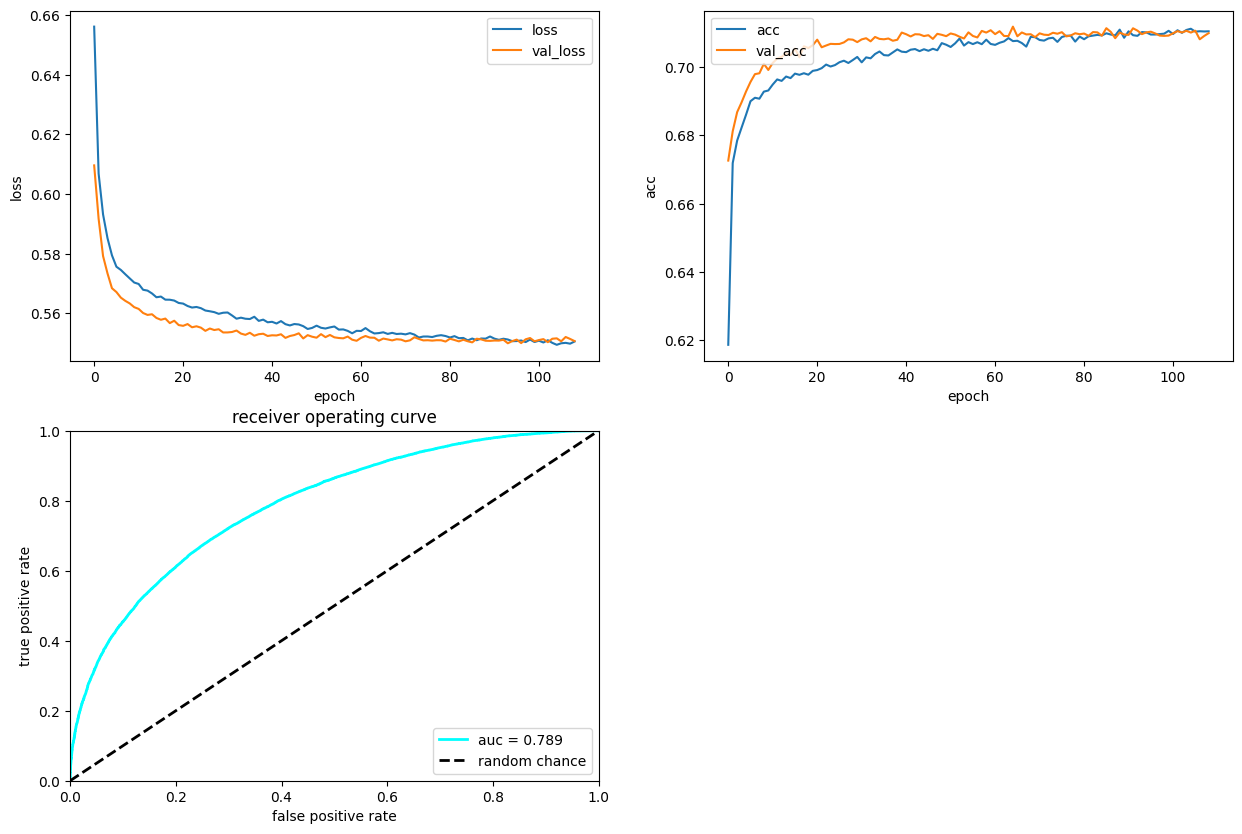

In [65]:
import matplotlib.pyplot as plt

%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15, 10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history["loss"], label="loss")
ax.plot(history.history["val_loss"], label="val_loss")
ax.legend(loc="upper right")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history["accuracy"], label="acc")
ax.plot(history.history["val_accuracy"], label="val_acc")
ax.legend(loc="upper left")
ax.set_xlabel("epoch")
ax.set_ylabel("acc")

# Plot ROC
Y_predict = model.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color="cyan", label="auc = %.3f" % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k", label="random chance")
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("receiver operating curve")
ax.legend(loc="lower right")
plt.show()

In [52]:
df["dense"] = model.predict(X)  # add prediction to array
print(df.loc[:30, ["lable", "dense"]])

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 833us/step
    lable     dense
0     1.0  0.690135
1     1.0  0.744833
2     1.0  0.947968
3     0.0  0.642996
4     1.0  0.420321
5     0.0  0.092710
6     1.0  0.958288
7     1.0  0.964127
8     1.0  0.779734
9     1.0  0.954868
10    1.0  0.686767
11    0.0  0.467183
12    1.0  0.942725
13    1.0  0.755485
14    1.0  0.914260
15    0.0  0.241940
16    1.0  0.480624
17    0.0  0.296478
18    0.0  0.747465
19    1.0  0.652568
20    1.0  0.909490
21    1.0  0.621881
22    0.0  0.435611
23    1.0  0.791600
24    0.0  0.470886
25    0.0  0.396951
26    1.0  0.864769
27    0.0  0.223731
28    1.0  0.645071
29    0.0  0.330175
30    1.0  0.490556


In [53]:
threshold = .6

final = np.zeros(df.shape[0])
for i in range(len(final)):
  if df.loc[i, "dense"] >= threshold:
    final[i] = 1.
  else:
    final[i] = 0.


success = 0
for i in range(len(final)):
  if df.loc[i, 'lable'] == final[i]:
    success += 1

print()
print('Threshold = %.2f' % (threshold))
print('Success Rate = %.3f' % (success/len(final)))


Threshold = 0.60
Success Rate = 0.698
